Project 1 - Terrence Cummings

This notebook is for performing multivariate regression and other analytics on the final home value, education, and crime statistics in the 11 Minneapolis communities.

Performs various iterations of multivariate regression to test hypothesis:

Does treating Violent and Non-violent crime as separate independent variable improve R2?
Do school rankings improve R2?
Does inclusion or exclusion of Central (which appears to be an outlier) improve R2?

In [20]:
# Dependencies and Setup
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
from scipy.stats import linregress
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [3]:
# Read in the final cleaned data files

#Table of home, educ, and crime stats by community
msp_home_educ_crime_summ_df = pd.DataFrame(pd.read_csv('./output_data/msp_home_educ_crime_summ.csv'))

#Table of home, educ, and crime stats by community excluding outlier Central community
msp_home_educ_crime_summ_nocentral_df = pd.DataFrame(pd.read_csv('./output_data/msp_home_educ_crime_summ_nocentral.csv'))


msp_home_educ_crime_summ_nocentral_df

,community,Value per Sqft,School Ranking,Total Crime Rate,Violent Crime Rate,Non-Violent Crime Rate,LAT,LNG
0,CALHOUN-ISLE,217.785079,2.500000,58.34,13.64,44.70,44.959319,-93.306924
1,CAMDEN,89.854937,1.333333,51.76,25.93,25.83,45.032955,-93.300300
2,LONGFELLOW,149.614650,3.500000,60.46,16.36,44.09,44.948282,-93.227425
3,NEAR NORTH,80.650318,1.625000,49.63,24.08,25.54,44.993191,-93.293128
4,NOKOMIS,145.605115,5.500000,26.82,10.99,15.84,44.906686,-93.237680
5,NORTHEAST,130.920763,2.714286,34.68,11.08,23.60,45.015793,-93.249438
6,PHILLIPS,99.845649,2.000000,64.29,26.17,38.12,44.956520,-93.257054
7,POWDERHORN,123.904829,1.888889,47.26,18.44,28.82,44.938932,-93.258480
8,SOUTHWEST,190.539065,5.600000,22.58,7.40,15.18,44.916219,-93.298635
9,UNIVERSITY,189.266289,2.000000,39.93,10.58,29.35,44.976498,-93.230213


In [4]:
#ALL MSP COMMUNITIES. 
#SCHOOL RANKING
#VIOLENT CRIME
#NON-VIOLENT CRIME

# create linear regression object
mlr = LinearRegression()
x, y =msp_home_educ_crime_summ_df[['School Ranking', 'Violent Crime Rate', 'Non-Violent Crime Rate']], msp_home_educ_crime_summ_df['Value per Sqft']

# fit linear regression
mlr.fit(x, y)

# get the slope and intercept of the line best fit.
intercept = mlr.intercept_
coefficient = mlr.coef_
R_squared = mlr.score(x,y)

val_line = f'Val sqft all = {intercept} + ({coefficient[0]})*School + ({coefficient[1]})*Violent + ({coefficient[2]})*Non-violent'
print(val_line)
print(f'R-squared= {R_squared}')

Val sqft all = 118.31624717769513 + (6.397147485989732)*School + (-5.651418759626093)*Violent + (3.4351724374815666)*Non-violent
R-squared= 0.889351128001846


In [5]:
#EXCLUDING CENTRAL. 
#SCHOOL RANKING
#VIOLENT CRIME
#NON-VIOLENT CRIME

# create linear regression object
mlr1 = LinearRegression()
x1, y1 =msp_home_educ_crime_summ_nocentral_df[['School Ranking', 'Violent Crime Rate', 'Non-Violent Crime Rate']], msp_home_educ_crime_summ_nocentral_df['Value per Sqft']

# fit linear regression
mlr1.fit(x1, y1)

# get the slope and intercept of the line best fit.
intercept1 = mlr1.intercept_
coefficient1 = mlr1.coef_
R_squared1 = mlr1.score(x1,y1)

val_line1 = f'Val sqft ex-C = {intercept1} + ({coefficient1[0]})*School + ({coefficient1[1]})*Violent + ({coefficient1[2]})*Non-violent'
print(val_line1)
print(f'R-squared= {R_squared1}')

Val sqft ex-C = 184.43239516400465 + (0.3734582429007245)*School + (-6.306401401944014)*Violent + (2.066286408305256)*Non-violent
R-squared= 0.8353804781677505


In [6]:
#ALL MSP. 
#SCHOOL RANKING
#TOTAL CRIME

# create linear regression object
mlr2 = LinearRegression()
x2, y2 =msp_home_educ_crime_summ_df[['School Ranking', 'Total Crime Rate']], msp_home_educ_crime_summ_df['Value per Sqft']

# fit linear regression
mlr2.fit(x2, y2)

# get the slope and intercept of the line best fit.
intercept2 = mlr2.intercept_
coefficient2 = mlr2.coef_
R_squared2 = mlr2.score(x2,y2)

val_line2 = f'Val sqft all = {intercept2} + ({coefficient2[0]})*School + ({coefficient2[1]})*Tot Crime'
print(val_line2)
print(f'R-squared= {R_squared2}')

Val sqft all = -28.370538779076554 + (26.463978743477853)*School + (2.1327247559992677)*Tot Crime
R-squared= 0.5635236838441315


In [7]:
#EX CENTRAL. 
#SCHOOL RANKING
#TOTAL CRIME

# create linear regression object
mlr3 = LinearRegression()
x3, y3 =msp_home_educ_crime_summ_nocentral_df[['School Ranking', 'Total Crime Rate']], msp_home_educ_crime_summ_nocentral_df['Value per Sqft']

# fit linear regression
mlr3.fit(x3, y3)

# get the slope and intercept of the line best fit.
intercept3 = mlr3.intercept_
coefficient3 = mlr3.coef_
R_squared3 = mlr3.score(x3,y3)

val_line3 = f'Val sqft EX-C = {intercept3} + ({coefficient3[0]})*School + ({coefficient3[1]})*Tot Crime'
print(val_line3)
print(f'R-squared= {R_squared3}')

Val sqft EX-C = 91.47791253499543 + (14.730329788543305)*School + (0.17775996611259376)*Tot Crime
R-squared= 0.20845644317905798


In [8]:
#ALL MSP. 
#SCHOOL RANKING
#VIOL CRIME

# create linear regression object
mlr4 = LinearRegression()
x4, y4 =msp_home_educ_crime_summ_df[['School Ranking', 'Violent Crime Rate']], msp_home_educ_crime_summ_df['Value per Sqft']

# fit linear regression
mlr4.fit(x4, y4)

# get the slope and intercept of the line best fit.
intercept4 = mlr4.intercept_
coefficient4 = mlr4.coef_
R_squared4 = mlr4.score(x4,y4)

val_line4 = f'Val sqft all = {intercept4} + ({coefficient4[0]})*School + ({coefficient4[1]})*Viol Crime'
print(val_line4)
print(f'R-squared= {R_squared4}')

Val sqft all = 133.8315868994571 + (9.98690615617591)*School + (-0.2803956068415329)*Viol Crime
R-squared= 0.05654867322556456


In [9]:
#ex -c. 
#SCHOOL RANKING
#VIOL CRIME

# create linear regression object
mlr5 = LinearRegression()
x5, y5 =msp_home_educ_crime_summ_nocentral_df[['School Ranking', 'Violent Crime Rate']], msp_home_educ_crime_summ_nocentral_df['Value per Sqft']

# fit linear regression
mlr5.fit(x5, y5)

# get the slope and intercept of the line best fit.
intercept5 = mlr5.intercept_
coefficient5 = mlr5.coef_
R_squared5 = mlr5.score(x5,y5)

val_line5 = f'Val sqft ex-C = {intercept5} + ({coefficient5[0]})*School + ({coefficient5[1]})*Viol Crime'
print(val_line5)
print(f'R-squared= {R_squared5}')

Val sqft ex-C = 262.6695586058876 + (-6.037224642663502)*School + (-6.289384405245405)*Viol Crime
R-squared= 0.6646887257575517


In [10]:
#all. 
#VIOL CRIME
#Non-violent crime

# create linear regression object
mlr6 = LinearRegression()
x6, y6 =msp_home_educ_crime_summ_df[['Violent Crime Rate', 'Non-Violent Crime Rate']], msp_home_educ_crime_summ_df['Value per Sqft']

# fit linear regression
mlr6.fit(x6, y6)

# get the slope and intercept of the line best fit.
intercept6 = mlr6.intercept_
coefficient6 = mlr6.coef_
R_squared6 = mlr6.score(x6,y6)

val_line6 = f'Val sqft all = {intercept6} + ({coefficient6[0]})*Viol Crime + ({coefficient6[1]})*Non-Viol Crime'
print(val_line6)
print(f'R-squared= {R_squared6}')

Val sqft all = 151.34124212318363 + (-6.560944515567364)*Viol Crime + (3.459890727536499)*Non-Viol Crime
R-squared= 0.8786720689351252


In [11]:
#=============THIS IS OUR FINAL CHOSEN MODEL!!!!===================

#no central. 
#VIOL CRIME
#Non-violent crime

# create linear regression object
mlr7 = LinearRegression()
x7, y7 =msp_home_educ_crime_summ_nocentral_df[['Violent Crime Rate', 'Non-Violent Crime Rate']], msp_home_educ_crime_summ_nocentral_df['Value per Sqft']

# fit linear regression
mlr7.fit(x7, y7)

# get the slope and intercept of the line best fit.
intercept7 = mlr7.intercept_
coefficient7 = mlr7.coef_
R_squared7 = mlr7.score(x7,y7)

val_line7 = f'Val sqft ex-C = {intercept7} + ({coefficient7[0]})*Viol Crime + ({coefficient7[1]})*Non-Viol Crime'
print(val_line7)
print(f'R-squared= {R_squared7}')

Val sqft ex-C = 186.76460889135444 + (-6.357173045867092)*Viol Crime + (2.0516586751963093)*Non-Viol Crime
R-squared= 0.8353100839801693


In [13]:
#Add a column for value per sqft as estimated by the multivariate linear regression model

msp_home_educ_crime_summ_nocentral_df['model_value'] = intercept7 + coefficient7[0]*msp_home_educ_crime_summ_nocentral_df['Violent Crime Rate'] + coefficient7[1]*msp_home_educ_crime_summ_nocentral_df['Non-Violent Crime Rate']

msp_home_educ_crime_summ_nocentral_df

,community,Value per Sqft,School Ranking,Total Crime Rate,Violent Crime Rate,Non-Violent Crime Rate,LAT,LNG,model_value
0,CALHOUN-ISLE,217.785079,2.500000,58.34,13.64,44.70,44.959319,-93.306924,191.761911
1,CAMDEN,89.854937,1.333333,51.76,25.93,25.83,45.032955,-93.300300,74.917455
2,LONGFELLOW,149.614650,3.500000,60.46,16.36,44.09,44.948282,-93.227425,173.218889
3,NEAR NORTH,80.650318,1.625000,49.63,24.08,25.54,44.993191,-93.293128,86.083245
4,NOKOMIS,145.605115,5.500000,26.82,10.99,15.84,44.906686,-93.237680,149.397551
5,NORTHEAST,130.920763,2.714286,34.68,11.08,23.60,45.015793,-93.249438,164.746276
6,PHILLIPS,99.845649,2.000000,64.29,26.17,38.12,44.956520,-93.257054,98.606619
7,POWDERHORN,123.904829,1.888889,47.26,18.44,28.82,44.938932,-93.258480,128.667141
8,SOUTHWEST,190.539065,5.600000,22.58,7.40,15.18,44.916219,-93.298635,170.865707
9,UNIVERSITY,189.266289,2.000000,39.93,10.58,29.35,44.976498,-93.230213,179.721900


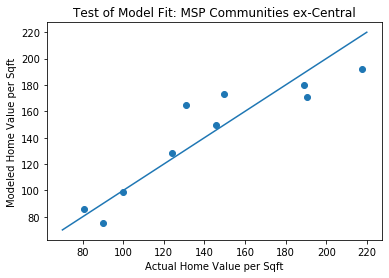

In [19]:
# Plot model vs predicted value per sqft

plt.scatter(msp_home_educ_crime_summ_nocentral_df['Value per Sqft'], msp_home_educ_crime_summ_nocentral_df['model_value'])
plt.plot([70,220], [70,220])
plt.xlabel('Actual Home Value per Sqft')
plt.ylabel('Modeled Home Value per Sqft')
plt.title('Test of Model Fit: MSP Communities ex-Central')
plt.show()

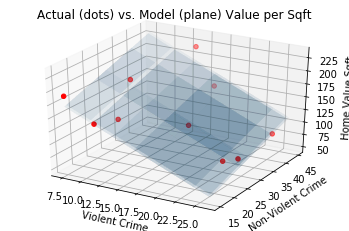

In [36]:
#3d plot of actual vs model

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =msp_home_educ_crime_summ_nocentral_df['Violent Crime Rate']
y =msp_home_educ_crime_summ_nocentral_df['Non-Violent Crime Rate']
z =msp_home_educ_crime_summ_nocentral_df['Value per Sqft']


plane_x, plane_y = np.meshgrid(msp_home_educ_crime_summ_nocentral_df['Violent Crime Rate'],msp_home_educ_crime_summ_nocentral_df['Non-Violent Crime Rate'])
plane_z = intercept7 + coefficient7[0]*plane_x + coefficient7[1]*plane_y

#fig = plt.figure()
#ax = fig.gca(projection='3d')

ax.plot_surface(plane_x, plane_y, plane_z, alpha = 0.02)
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('Violent Crime')
ax.set_ylabel('Non-Violent Crime')
ax.set_zlabel('Home Value Sqft')
ax.set_title('Actual (dots) vs. Model (plane) Value per Sqft')

plt.show()

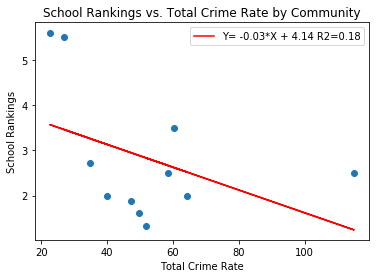

In [37]:
ax1=[]
ax2=[]
plotx = msp_home_educ_crime_summ_df['Total Crime Rate']
ploty = msp_home_educ_crime_summ_df['School Ranking']

#Do scatter plot, titel, and labels
ax1=plt.scatter(plotx, ploty)
ax1=plt.title('School Rankings vs. Total Crime Rate by Community')
ax1=plt.xlabel('Total Crime Rate')
ax1=plt.ylabel('School Rankings')

    
#Perform linear regression and r2 and plot
slope, intercept, rvalue, pvalue, stderr = st.linregress(plotx,ploty)
r_squared = rvalue**2
ax2=plt.plot(plotx, plotx*slope+intercept, color='red', label= 'Y= '+str(round(slope,2))+'*X + '+str(round(intercept,2))+' R2='+str(round(r_squared,2)))
#Use legend to show the linear regression equation and R2 value
ax2=plt.legend()